In [215]:
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from PIL import Image

from skimage import io
from skimage import color
from skimage import exposure
from skimage.io import imread, imshow
from skimage.color import rgb2gray

from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

<class 'numpy.ndarray'>


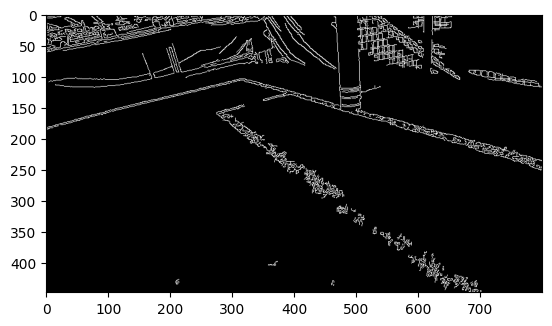

In [239]:
image_test = '212-rgb.png'
# Loads an image

src = cv.imread(image_test, cv.IMREAD_GRAYSCALE)

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
masque_intermediaire = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

print(type(masque_intermediaire))

im = Image.fromarray(masque_intermediaire)
im.save("masque_intermediaire.png")

image_test = io.imread('212-rgb.png')


plt.imshow(masque_intermediaire)

plt.show()

,Min,Max,Mean,Median
Red,28,255,70.869046,61.0
Green,10,254,72.196828,68.0
Blue,0,255,34.908845,34.0


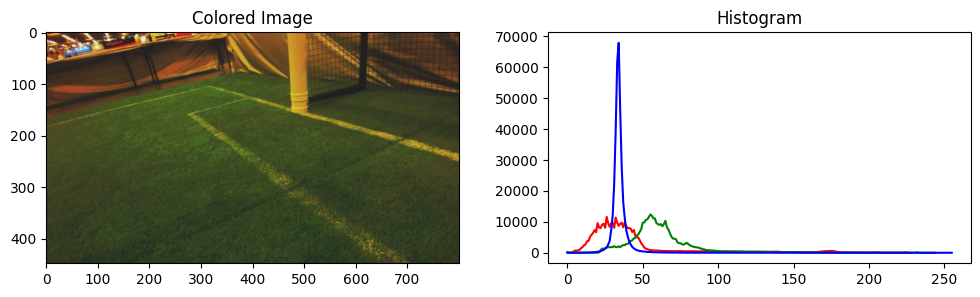

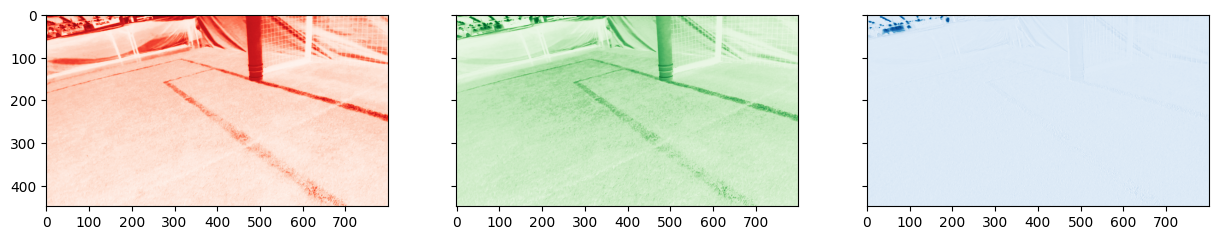

In [227]:
#fonction qui affiche l'histogramme d'une image donnée en RGB grace à la librairie skimage
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)
            
            
#Dans le code ci-dessus vous remarquerez que je regarde en premier lieu le nombre de dimensions de la matrice image. 
#Si on a 3 dimensions c’est que l’on a une image avec couleur sinon on est en niveau de gris. 

imageHist(image_test)

#fonction qui affiche les caractéristiques d'occurence de couleurs dans une image
def RGBStats(image): 
    colors = [] 
    for i in range(0, 3): 
        max_color =np.max(image[:,:,i]) 
        min_color =np.min(image[:,:,i]) 
        mean_color = np.mean(image[:,:,i]) 
        median_color = np.median(image[:,:,i]) 
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors, index = ['Red', ' Green', 'Blue'], columns = ['Min', 'Max', 'Mean', 'Median'])


#affichage des trois canaux de l'image
rgb = ['Reds','Greens','Blues']
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
    axes[i].imshow(image_test[:,:,i], cmap = rgb[i])

    
#Effectuons un seuillage pour obtenir l'image avec les couleurs dominante(nuances du terrain) uniquement :
 
#image_test_modified = image_test.copy()
#image_test_modified[:,:,0] = np.where(image_test[:,:,0]>20, image_test[:,:,0], 0) #je ne sais pas quoi faire 
#exactement pour n'obtenir que les nuances dominantes de l'image c-à-d du terrain "vert"


#imageHist(image_test_modified)
RGBStats(image_test)


In [228]:
print(image_test.shape)
#(148, 164, 36)
#(120, 126, 41)

(448, 800, 3)


254770


<function matplotlib.pyplot.show(close=None, block=None)>

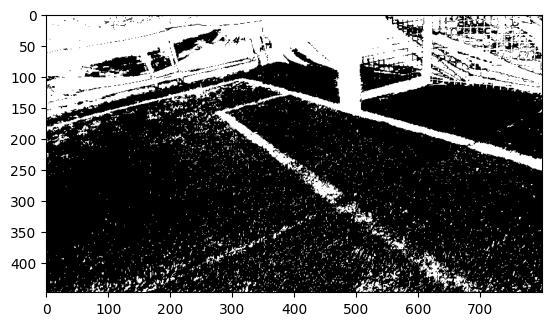

In [229]:
R = image_test[:,:,0] 
G = image_test[:,:,1]
B = image_test[:,:,2]

condition = False
x=0
for i in range(448):
    for j in range(800):
        if ((R[i][j]>39 and R[i][j]<77 )and (G[i][j]>49 and G[i][j]<132) and (B[i][j]>25 and B[i][j]<48) ) :
            x = x + 1
            R[i][j] = 0
            G[i][j] = 0
            B[i][j] = 0
        else :
            R[i][j] = 255
            G[i][j] = 255
            B[i][j] = 255
        
print(x)
masque_terrain = np.stack((R,G,B),axis=2)
plt.imshow(masque_terrain)
plt.show

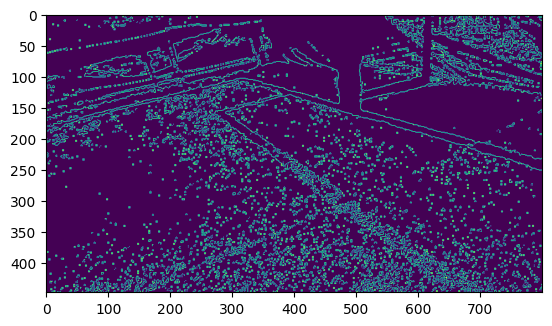

In [242]:
#appliquer le filtre de Canny à ce masque
terrain = cv.Canny(masque_terrain, 50, 200, None, 3)
plt.imshow(terrain)
plt.show()

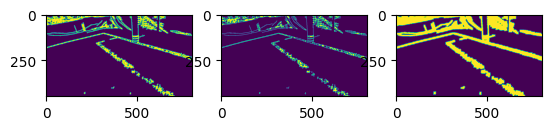

In [258]:
# Reading the input image
img = cv.imread('masque_intermediaire.png', 0)
terrain=masque_terrain


# Taking a matrix of size 5 as the kernel
kernel = np.ones((3,3), np.uint8)
kernel1 = np.ones((3,3), np.uint8)
kernel2 = np.ones((9,9), np.uint8)
#kernel3 = np.ones((17,17), np.uint8)

# The first parameter is the original image,
#kernel is the matrix with which image is convolved and third parameter is the number
# of iterations, which will determine how much you want to erode/dilate a given image.

img_dilatee = cv.dilate(img, kernel, iterations=1)

img_erodee = cv.erode(img_dilatee, kernel1, iterations=1)

img_dilatee_2 = cv.dilate(img_erodee, kernel2, iterations=1)

#img_erodee_2 = cv.erode(img_dilatee_2, kernel3, iterations=1)

lignes_dilatees = Image.fromarray(img_dilatee_2)
lignes_dilatees.save("lignes_dilatees.png")

fig, ax = plt.subplots(1,3)
ax[0].imshow(img_dilatee)
ax[1].imshow(img_erodee)
ax[2].imshow(img_dilatee_2)

plt.show()

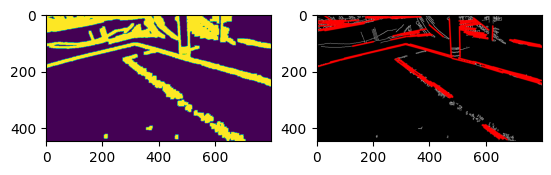

In [259]:
image_test = 'lignes_dilatees.png'
# Loads an image

sourc = cv.imread(image_test, cv.IMREAD_GRAYSCALE)

# Copy edges to the images that will display the results in BGR
cdstP = cv.cvtColor(dst, cv.COLOR_GRAY2RGB)

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)


if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)


        
ligne_rouge = Image.fromarray(cdstP)
ligne_rouge.save("ligne_rouge.png")

fig, ax = plt.subplots(1, 2)
ax[0].imshow(sourc)
ax[1].imshow(cdstP)

plt.show()

In [260]:
#etape suivante : appliquer une erosion puis une dilatation à l'image avec du rouge!

In [261]:
masque_test = 'ligne_rouge.png'

masque_t = cv.imread(masque_test)
print(masque_t[:,:,0])

[[  0 255   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


(800, 448)


<function matplotlib.pyplot.show(close=None, block=None)>

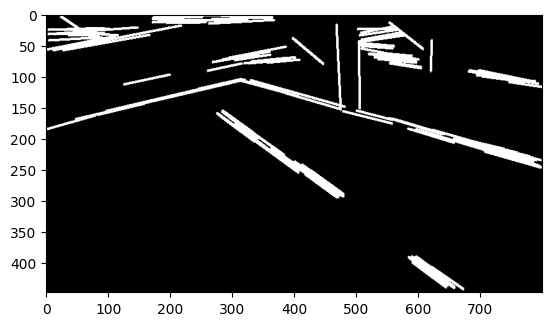

In [262]:
img = Image.open("ligne_rouge.png")
print(img.size)
for j in range(0,448):
    for i in range(0,800):
        r,v,b = img.getpixel((i,j))
        if (r==255 and v==0 and b==0 ):
            img.putpixel((i,j),(255,255,255))
        else :
            img.putpixel((i,j),(0,0,0))         


plt.imshow(img)
plt.show

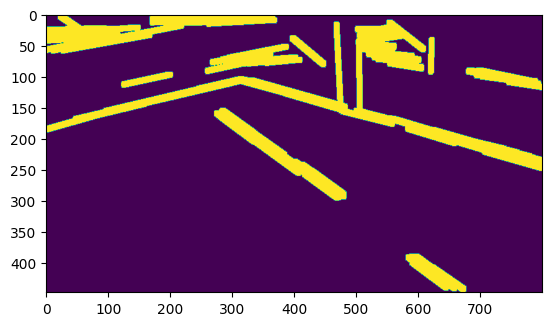

In [263]:
img.save("masque_test.png")

masque_test = cv.imread('masque_test.png', 0)


kernel = np.ones((7,7), np.uint8)

masque_dilate = cv.dilate(masque_test, kernel, iterations=1)

masque_dilate = Image.fromarray(masque_dilate)

masque_dilate.save("masque_dilate.png")

plt.imshow(masque_dilate)
plt.show()